In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from enum import Enum
from typing import Any, List

In [12]:
calib = cv2.imread('dane/calib.png')
# plt.subplots(1, 1, figsize=(12,8))[1].imshow(calib[..., ::-1]);
test = cv2.imread('dane/test.png')
# plt.subplots(1, 1, figsize=(12,8))[1].imshow(calib[..., ::-1]);

In [13]:
calib_hsv = cv2.cvtColor(calib, cv2.COLOR_BGR2HSV)
test_hsv = cv2.cvtColor(test, cv2.COLOR_BGR2HSV)
calib_lab = cv2.cvtColor(calib, cv2.COLOR_BGR2LAB)
test_lab = cv2.cvtColor(test, cv2.COLOR_BGR2LAB)
calib_hls = cv2.cvtColor(calib, cv2.COLOR_BGR2HLS)
test_hls = cv2.cvtColor(test, cv2.COLOR_BGR2HLS)
calib_yuv = cv2.cvtColor(calib, cv2.COLOR_BGR2YUV)
test_yuv = cv2.cvtColor(test, cv2.COLOR_BGR2YUV)
calib_gray = cv2.cvtColor(calib, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

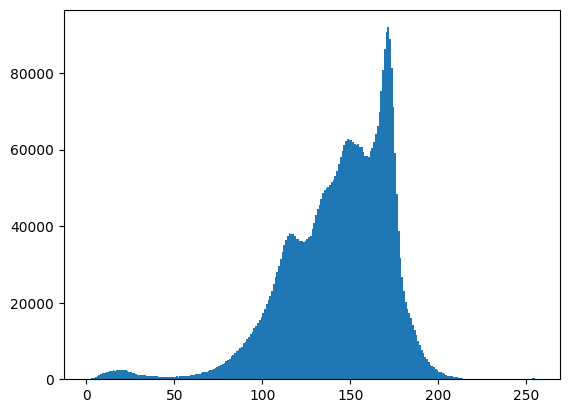

In [14]:
hist_values = test_gray.ravel()
plt.hist(hist_values, bins=256, range=[0,256]);

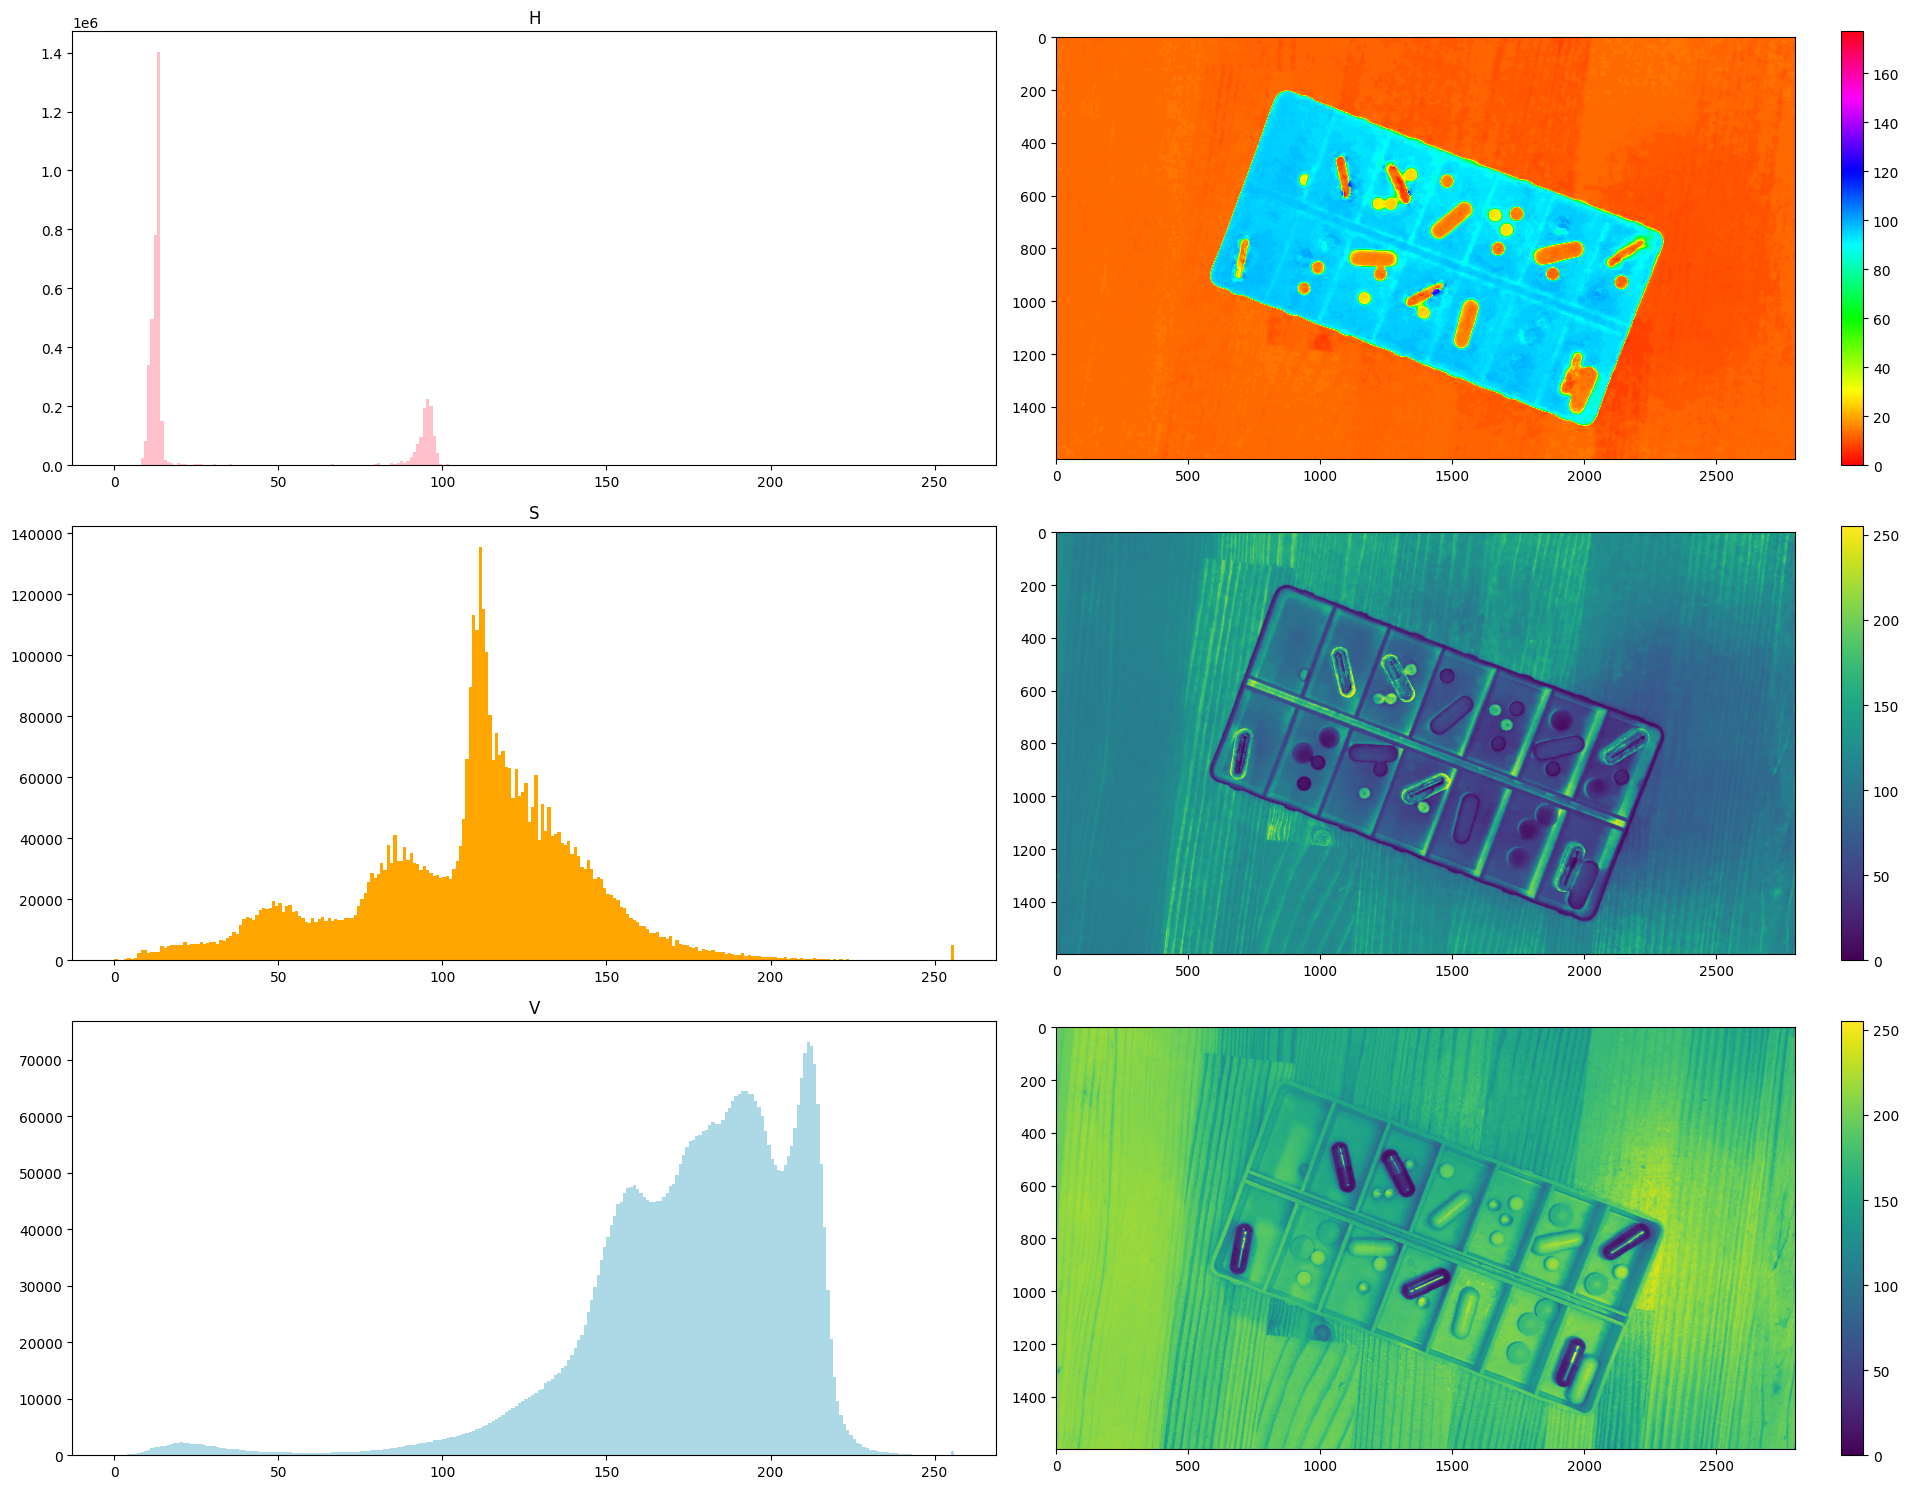

In [15]:
h,s,v = cv2.split(test_hsv)
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.hist(h.ravel(),256,[0,256], color='pink')
plt.title('H')
plt.subplot(3,2,2)
ym = plt.imshow(h, cmap='hsv')
plt.colorbar(ym)
plt.subplot(3,2,3)
plt.hist(s.ravel(),256,[0,256], color='orange')
plt.title('S')
plt.subplot(3,2,4)
um = plt.imshow(s)
plt.colorbar(um)
plt.subplot(3,2,5)
plt.hist(v.ravel(),256,[0,256], color='lightblue')
plt.title('V')
plt.subplot(3,2,6)
vm = plt.imshow(v)
plt.colorbar(vm)

plt.tight_layout()
plt.show()

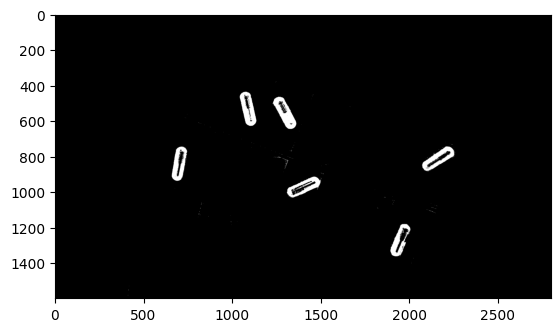

In [16]:
thresholded_black = cv2.threshold(test_gray, 40, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresholded_black, cmap='gray');

In [17]:
contours, hierarchy = cv2.findContours(thresholded_black, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
correct = [c for c in contours if c.shape[0] > 200]
len(correct)

6

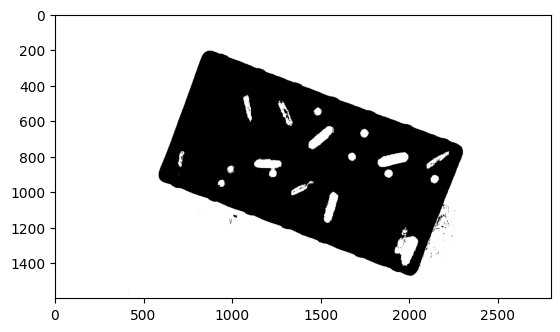

In [18]:
h,s,v = cv2.split(test_hsv)
mask_h = cv2.inRange(h, 8, 19)
plt.imshow(mask_h, cmap='gray');

In [19]:
black_hull_mask = cv2.bitwise_and(thresholded_black, mask_h)
plt.imshow(balck_mask, cmap='gray');

NameError: name 'balck_mask' is not defined

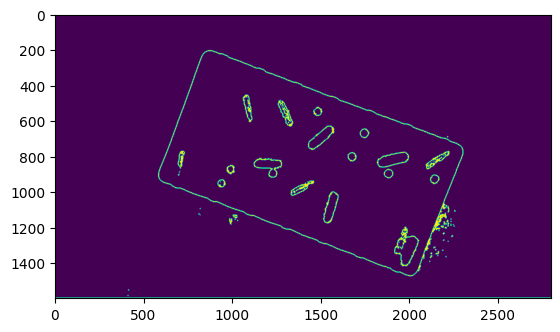

In [ ]:
contours = cv2.findContours(np.int32(mask_h), cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_SIMPLE)[0]
plt.imshow(cv2.drawContours(np.zeros_like(calib_gray), contours, -1, 255, 3));

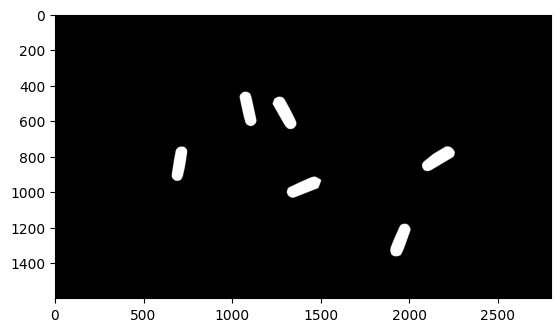

In [ ]:
hull_mask = np.zeros_like(black_hull_mask)
for contour in correct:
    # Get the convex hull of the contour
    hull = cv2.convexHull(contour)
    # Draw and fill the convex hull
    cv2.drawContours(hull_mask, [hull], -1, 255, thickness=cv2.FILLED)
plt.imshow(hull_mask, cmap='gray');

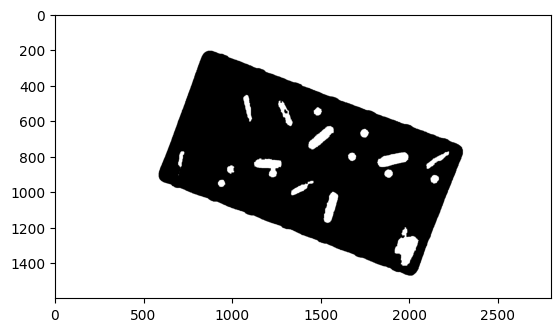

In [ ]:
kernel = np.ones((9, 9), np.uint8)
mask_h = cv2.morphologyEx(mask_h, cv2.MORPH_CLOSE, kernel)
plt.imshow(mask_h, cmap='gray');

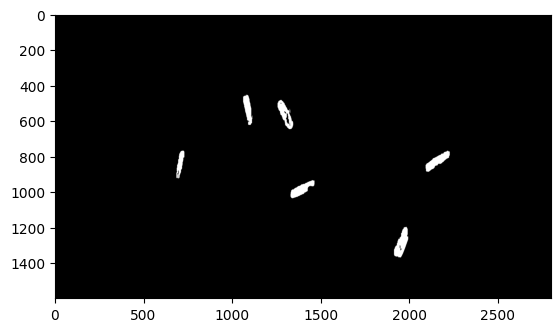

In [ ]:
black_hull_mask = cv2.bitwise_and(hull_mask, mask_h)
dilate = cv2.dilate(black_hull_mask, (5,5), iterations=15)
plt.imshow(dilate, cmap='gray');

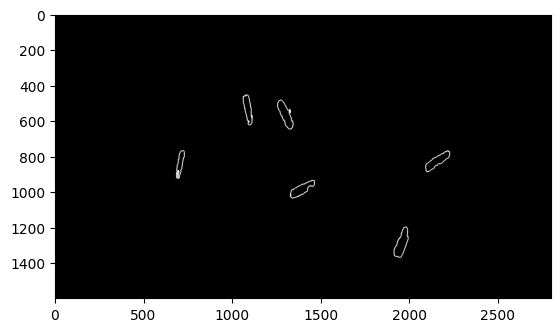

In [ ]:
contours = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
display = np.zeros_like(black_hull_mask)
cv2.drawContours(display, contours, -1, (255, 255, 0), 3)
plt.imshow(display, cmap='gray');

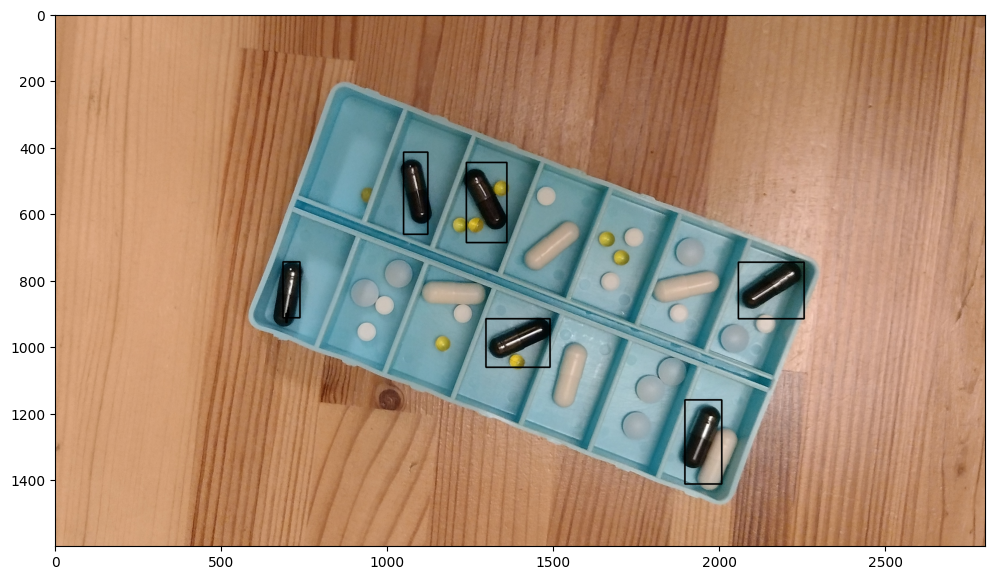

In [ ]:
plt.figure(figsize=(12,8))
image = test.copy()
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x-int(w/4), y-int(h/4)), (x+w+int(w/4), y+h+int(h/4)), (0, 0, 0), 3)

plt.imshow(image[..., ::-1]);

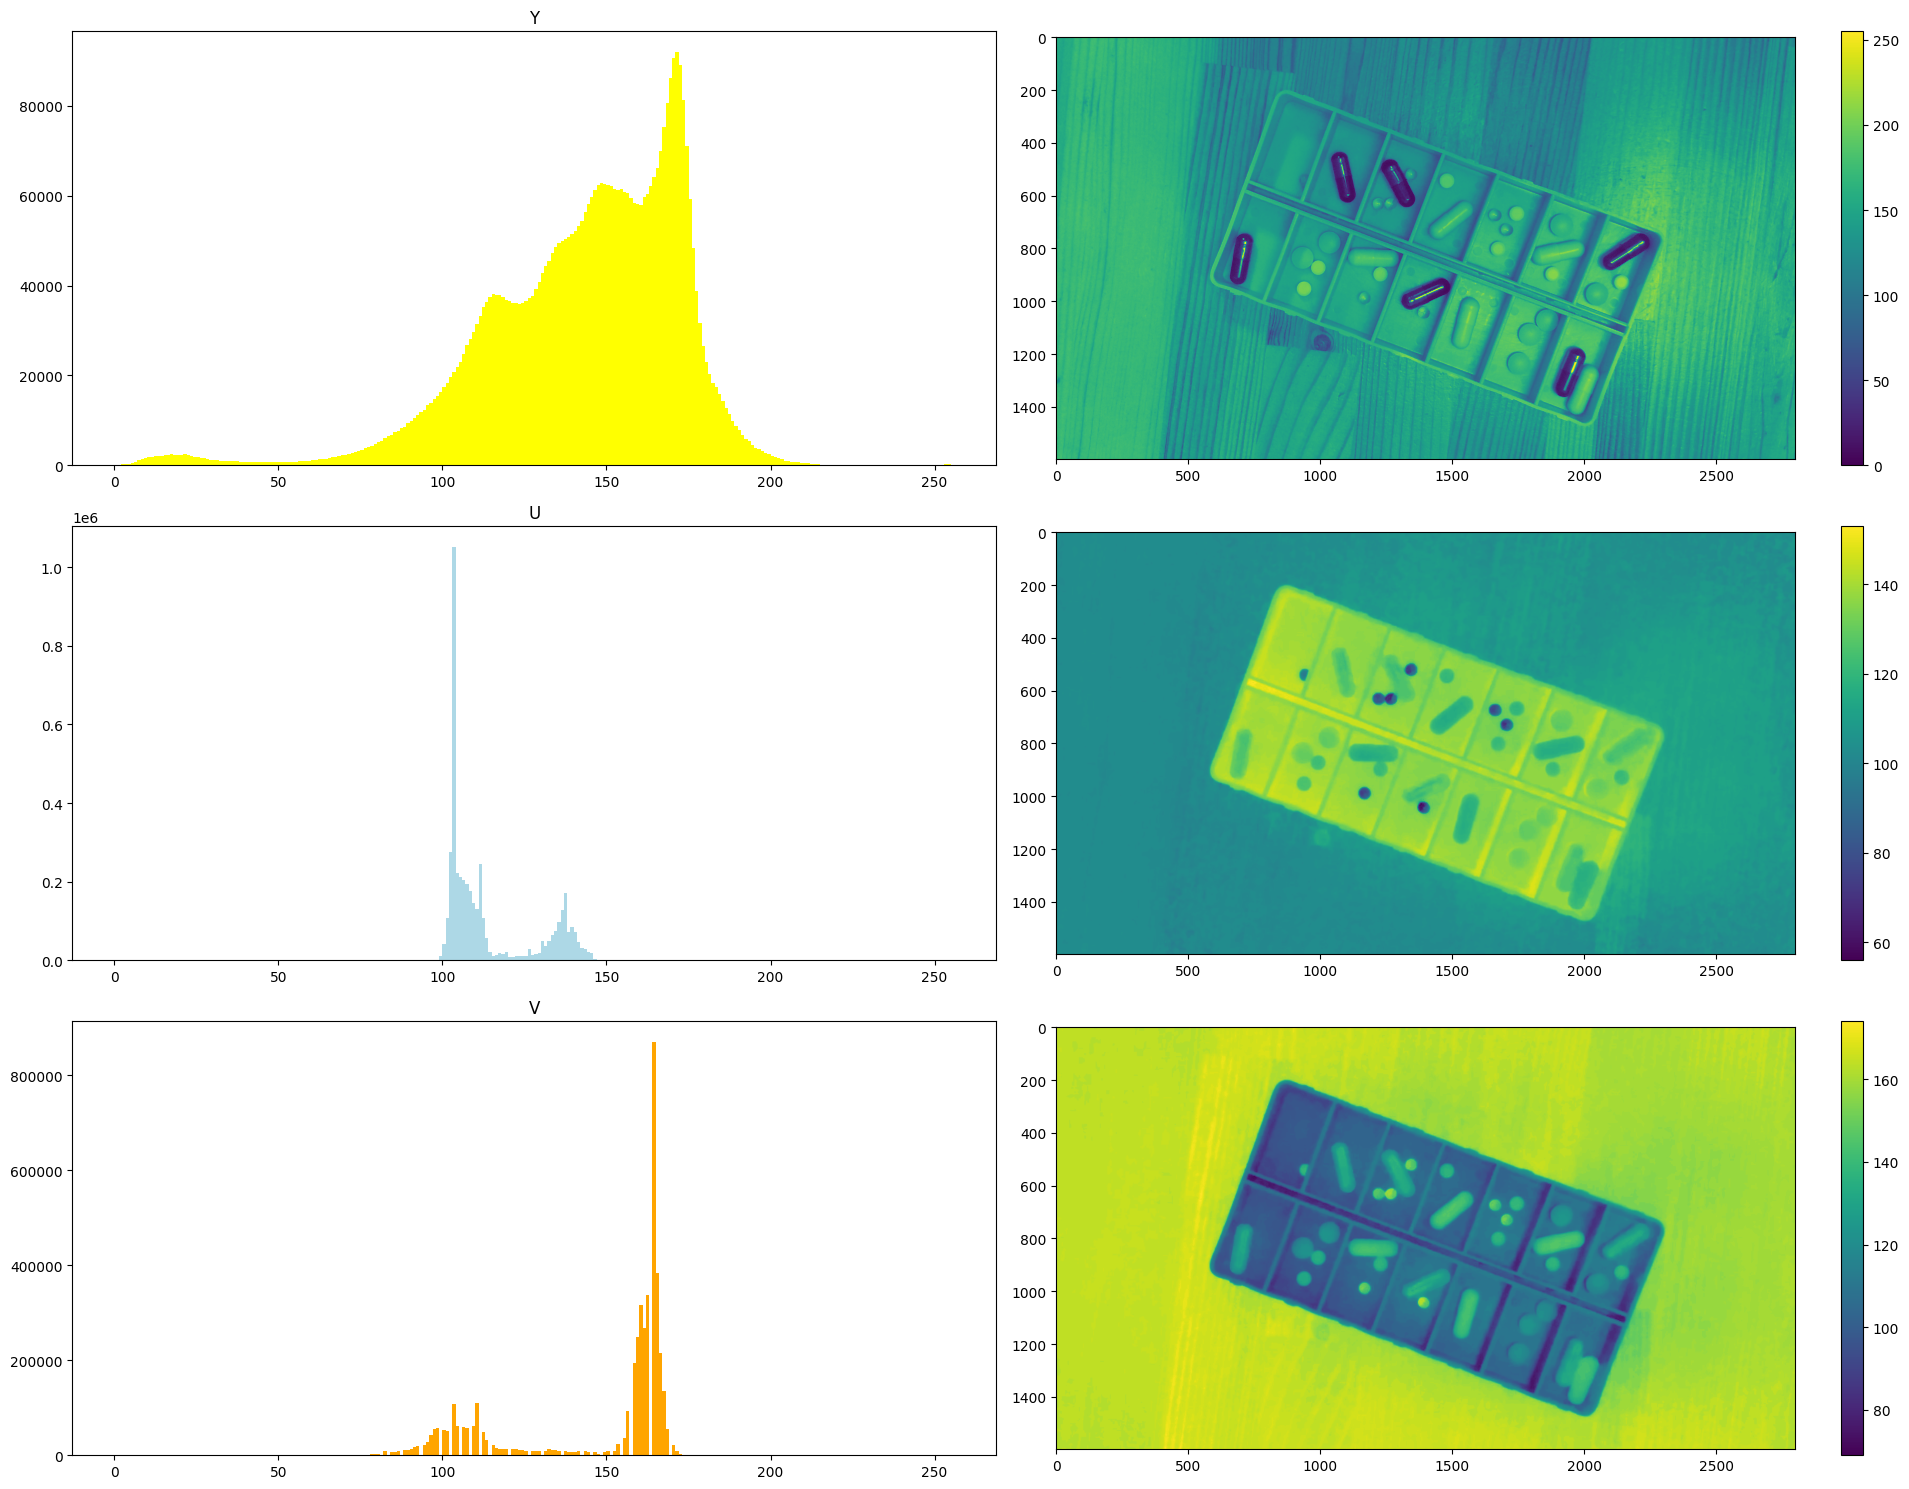

In [ ]:
y,u,v = cv2.split(test_yuv)
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.hist(y.ravel(),256,[0,256], color='yellow')
plt.title('Y')
plt.subplot(3,2,2)
ym = plt.imshow(y)
plt.colorbar(ym)
plt.subplot(3,2,3)
plt.hist(u.ravel(),256,[0,256], color='lightblue')
plt.title('U')
plt.subplot(3,2,4)
um = plt.imshow(u)
plt.colorbar(um)
plt.subplot(3,2,5)
plt.hist(v.ravel(),256,[0,256], color='orange')
plt.title('V')
plt.subplot(3,2,6)
vm = plt.imshow(v)
plt.colorbar(vm)

plt.tight_layout()
plt.show()

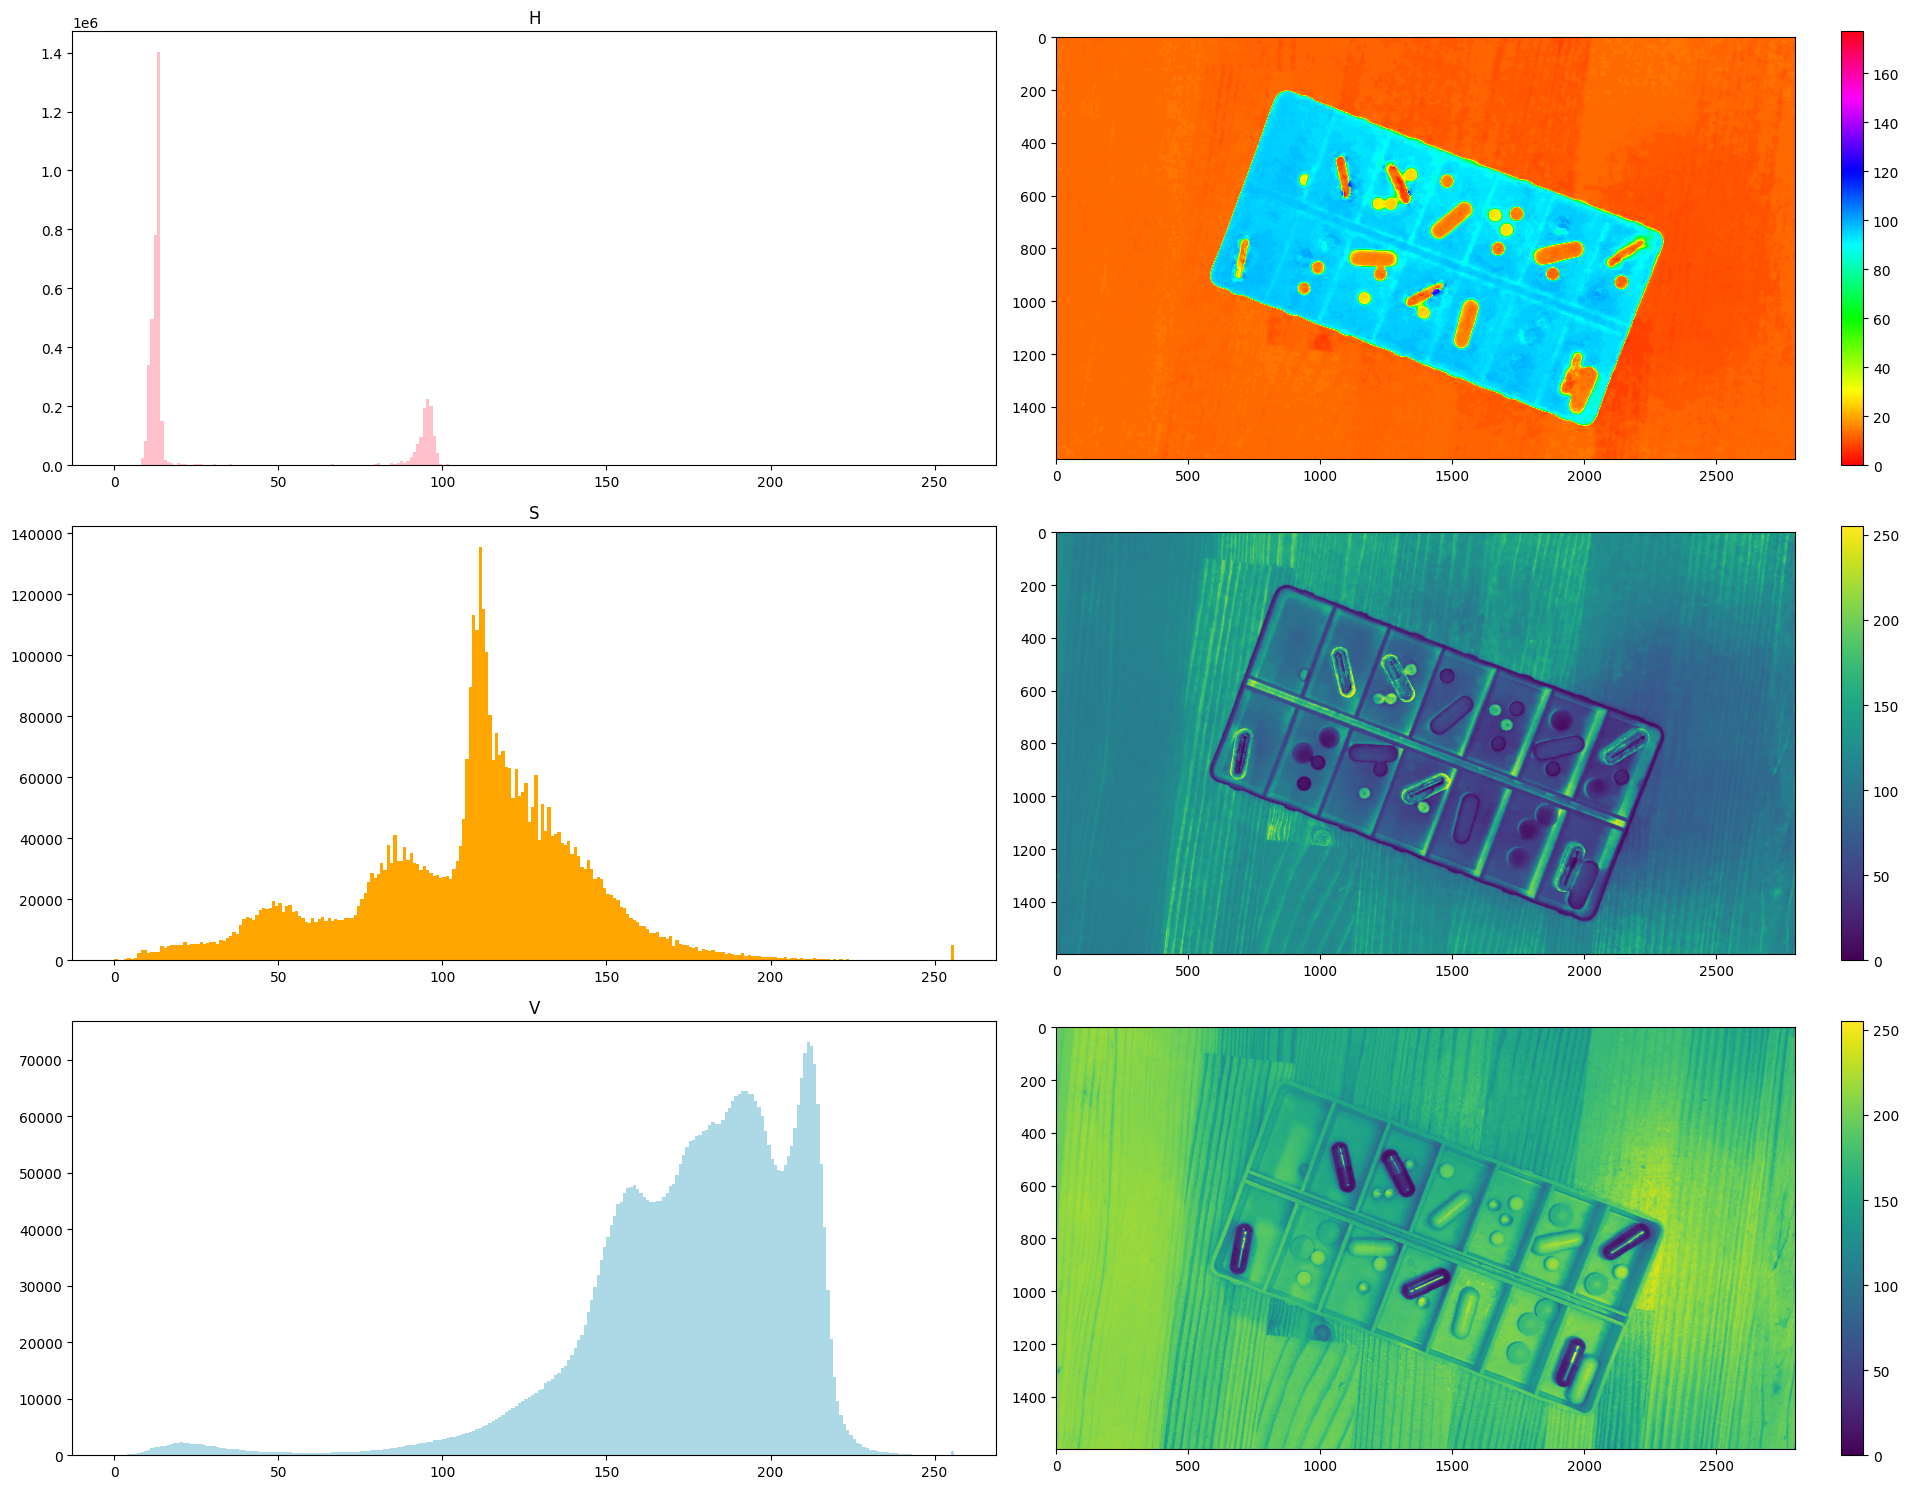

In [ ]:
h,s,v = cv2.split(test_hsv)
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.hist(h.ravel(),256,[0,256], color='pink')
plt.title('H')
plt.subplot(3,2,2)
ym = plt.imshow(h, cmap='hsv')
plt.colorbar(ym)
plt.subplot(3,2,3)
plt.hist(s.ravel(),256,[0,256], color='orange')
plt.title('S')
plt.subplot(3,2,4)
um = plt.imshow(s)
plt.colorbar(um)
plt.subplot(3,2,5)
plt.hist(v.ravel(),256,[0,256], color='lightblue')
plt.title('V')
plt.subplot(3,2,6)
vm = plt.imshow(v)
plt.colorbar(vm)

plt.tight_layout()
plt.show()

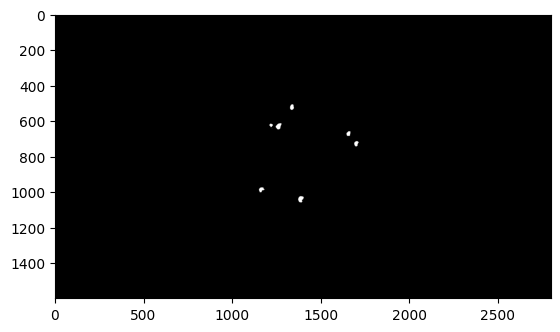

In [ ]:
thresholded = cv2.threshold(u, 80, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresholded, cmap='gray');

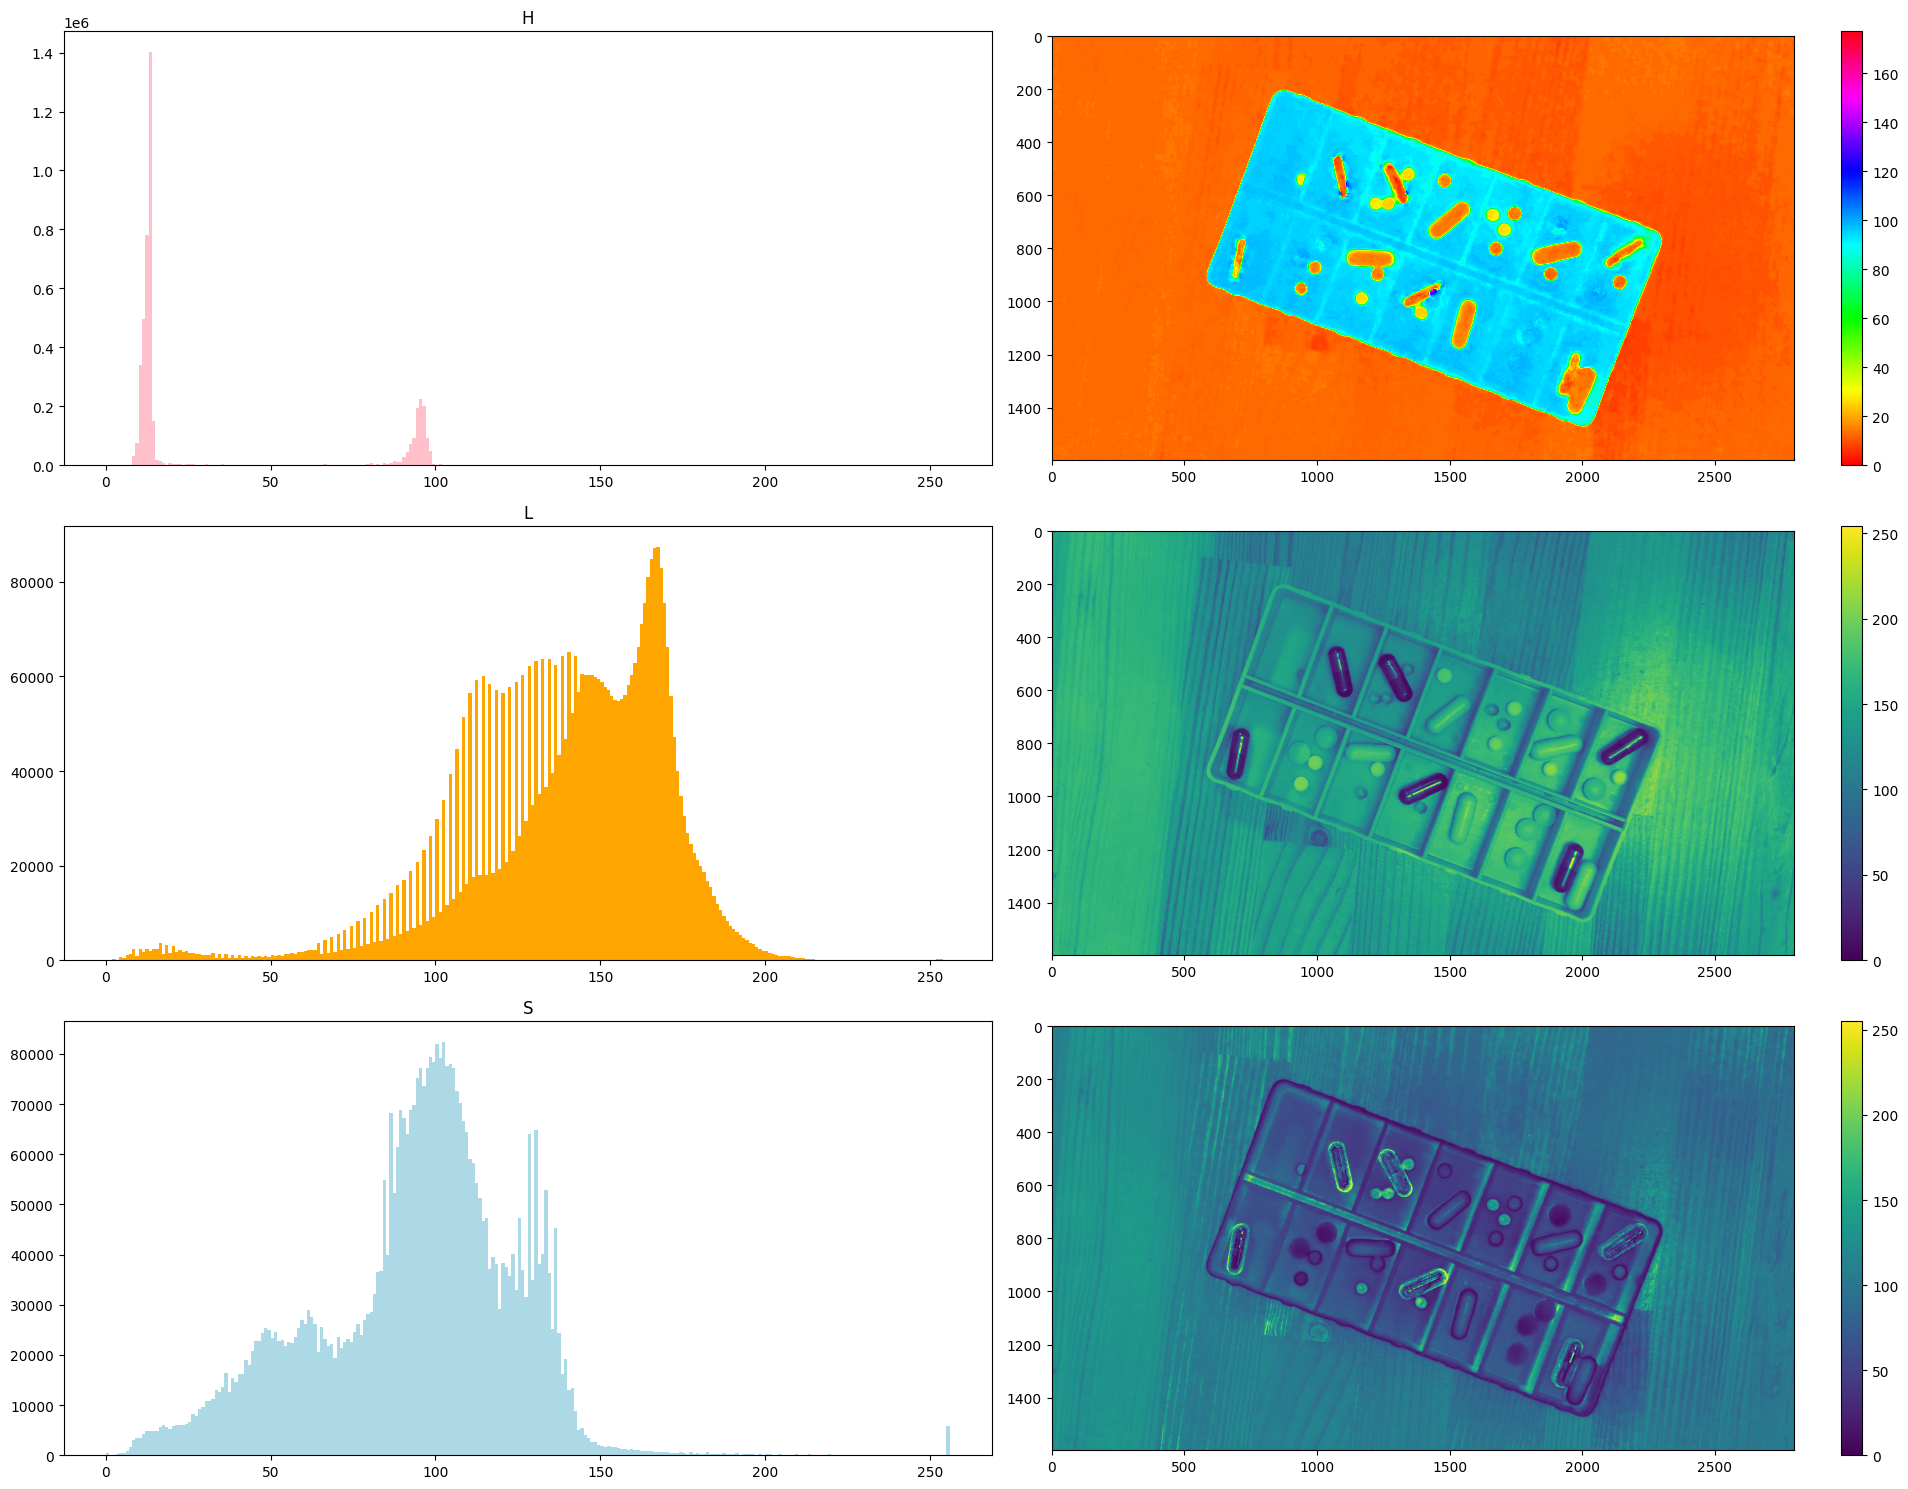

In [ ]:
h,l,s = cv2.split(test_hls)
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.hist(h.ravel(),256,[0,256], color='pink')
plt.title('H')
plt.subplot(3,2,2)
ym = plt.imshow(h, cmap='hsv')
plt.colorbar(ym)
plt.subplot(3,2,3)
plt.hist(l.ravel(),256,[0,256], color='orange')
plt.title('L')
plt.subplot(3,2,4)
um = plt.imshow(l)
plt.colorbar(um)
plt.subplot(3,2,5)
plt.hist(s.ravel(),256,[0,256], color='lightblue')
plt.title('S')
plt.subplot(3,2,6)
vm = plt.imshow(s)
plt.colorbar(vm)

plt.tight_layout()
plt.show()

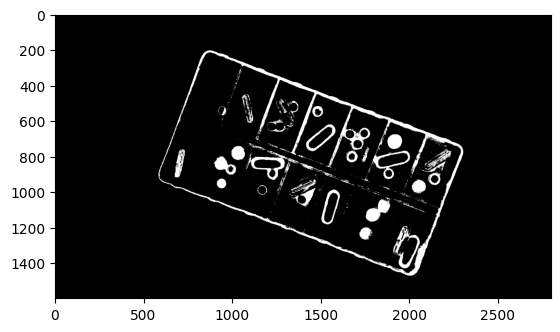

In [ ]:
h,l,s = cv2.split(test_hls)
thresholded = cv2.threshold(s, 35, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresholded, cmap='gray');

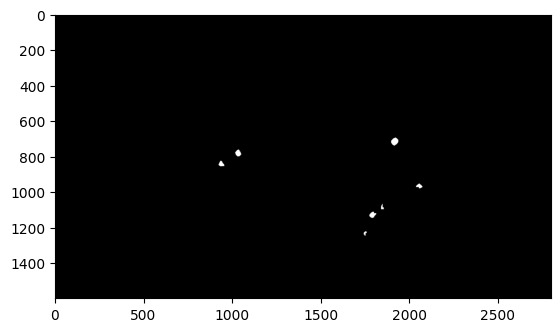

In [ ]:
eroded = cv2.erode(thresholded, np.ones((5,5), np.uint8), iterations=8)
plt.imshow(eroded, cmap='gray');

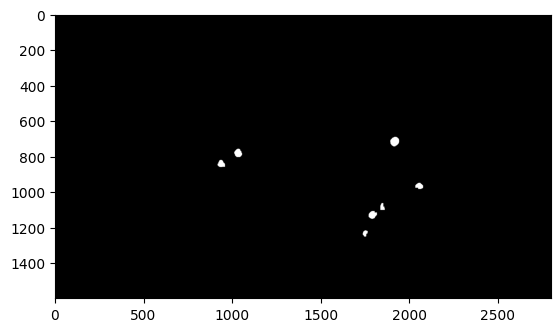

In [ ]:
dilated = cv2.dilate(eroded, np.ones((5,5), np.uint8), iterations=2)
plt.imshow(dilated, cmap='gray')

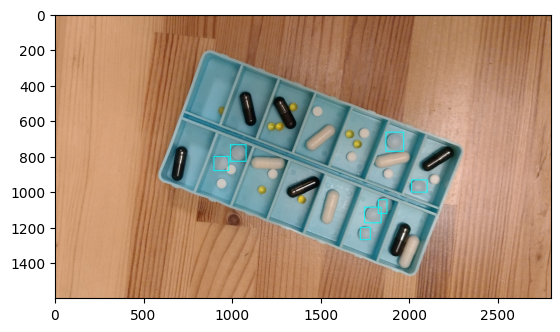

In [ ]:
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(np.array(contours).shape)
image = test.copy()
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x-int(w/2), y-int(h/2)), (x+w+int(w/2), y+h+int(h/2)), (255, 255, 0), 3)

plt.imshow(image[..., ::-1]);

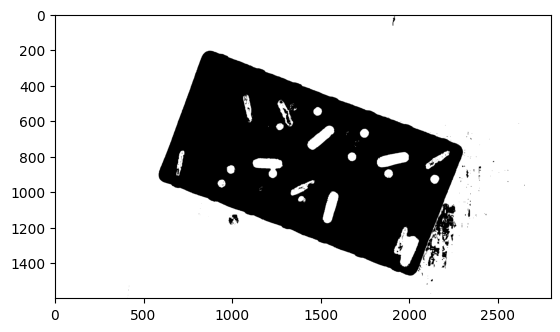

In [ ]:
h,s,v = cv2.split(test_hsv)
mask_h = cv2.inRange(h, 9, 25)
plt.imshow(mask_h, cmap='gray');

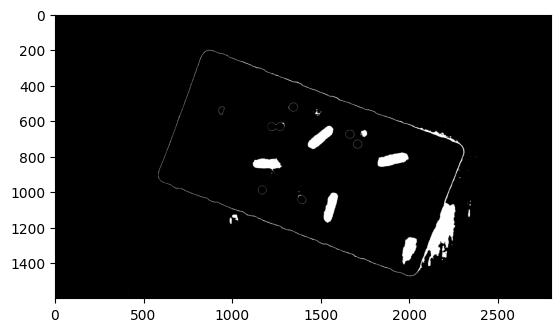

In [ ]:
y,u,v = cv2.split(test_yuv)
mask_u = cv2.inRange(u, 115, 120)
plt.imshow(mask_u, cmap='gray');

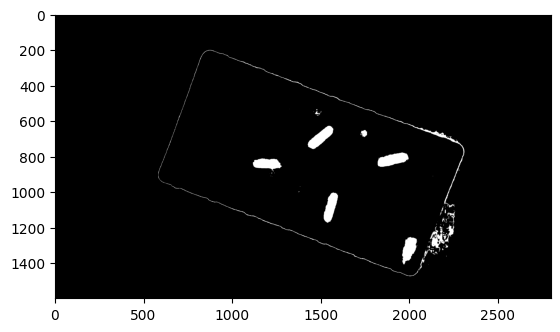

In [ ]:
mask_hu = cv2.bitwise_and(mask_h, mask_u)
plt.imshow(mask_hu, cmap='gray');

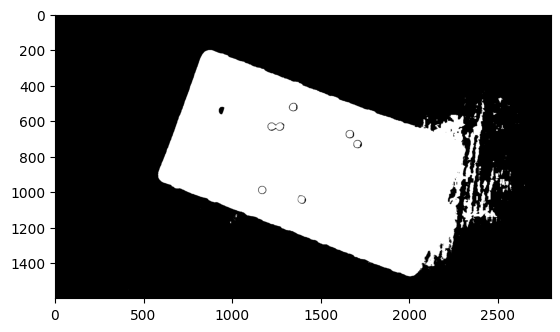

In [ ]:
l,a,b = cv2.split(test_lab)
mask_b = ~cv2.inRange(b, 145, 170)
plt.imshow(mask_b, cmap='gray');

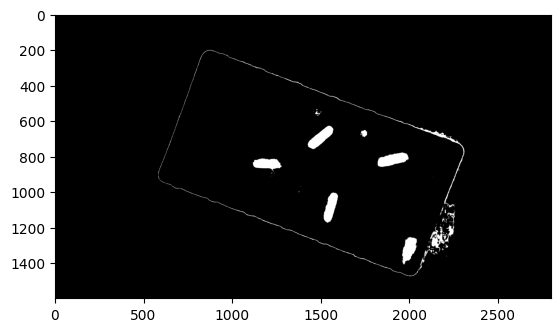

In [ ]:
mask_hub = cv2.bitwise_and(mask_hu, mask_b)
plt.imshow(mask_hub, cmap='gray');

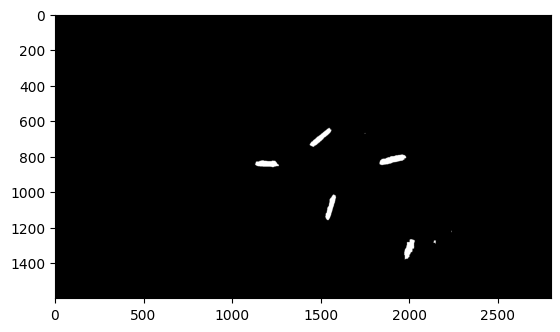

In [ ]:
eroded = cv2.erode(mask_hub, np.ones((3,3), np.uint8), iterations=9)
plt.imshow(eroded, cmap='gray');

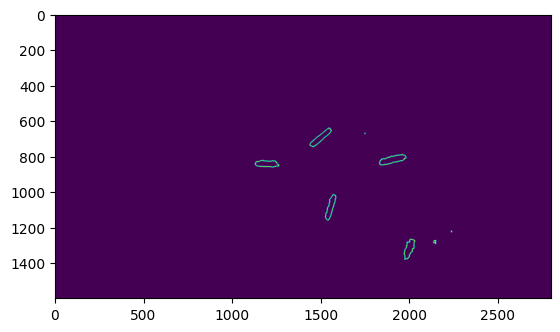

In [ ]:
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(np.zeros_like(b), contours, -1, (255, 255, 0), 3));

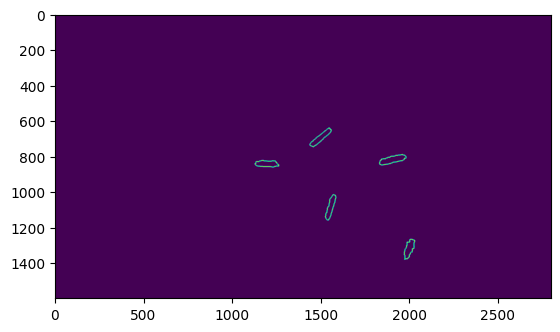

In [ ]:
white_pills = [c for c in contours if cv2.contourArea(c) > 1000]
plt.imshow(cv2.drawContours(np.zeros_like(b), white_pills, -1, (255, 255, 0), 3));

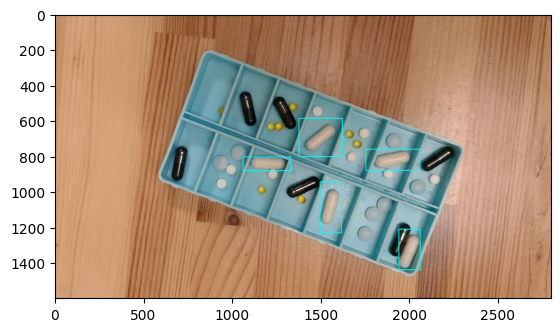

In [ ]:
image = test.copy()
for c in white_pills:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x-int(w/2), y-int(h/2)), (x+w+int(w/2), y+h+int(h/2)), (255, 255, 0), 3)
plt.imshow(image[..., ::-1]);

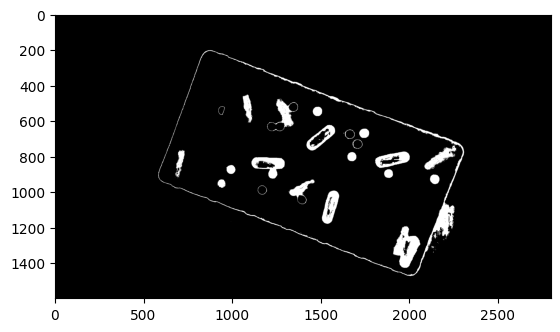

In [ ]:
mask_b = cv2.inRange(b, 130, 140)
plt.imshow(mask_b, cmap='gray');

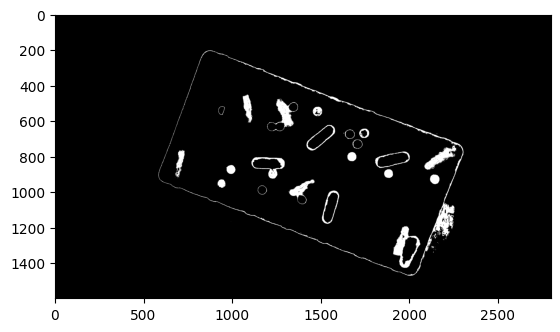

In [ ]:
mask = cv2.bitwise_and(~mask_hub, mask_b)
plt.imshow(mask, cmap='gray');

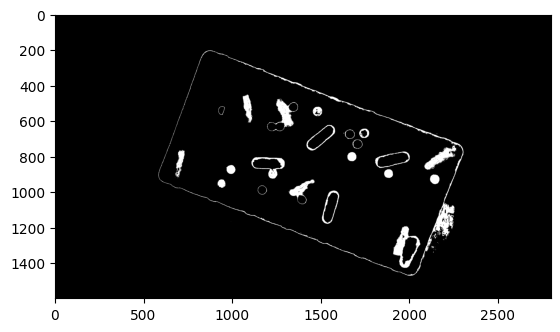

In [ ]:
mask = cv2.bitwise_and(~dilated, mask)
plt.imshow(mask, cmap='gray');

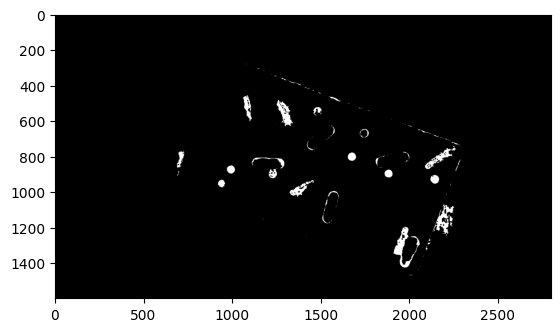

In [ ]:
edored = cv2.erode(mask, np.ones((3,3), np.uint8), iterations=2)
plt.imshow(edored, cmap='gray');

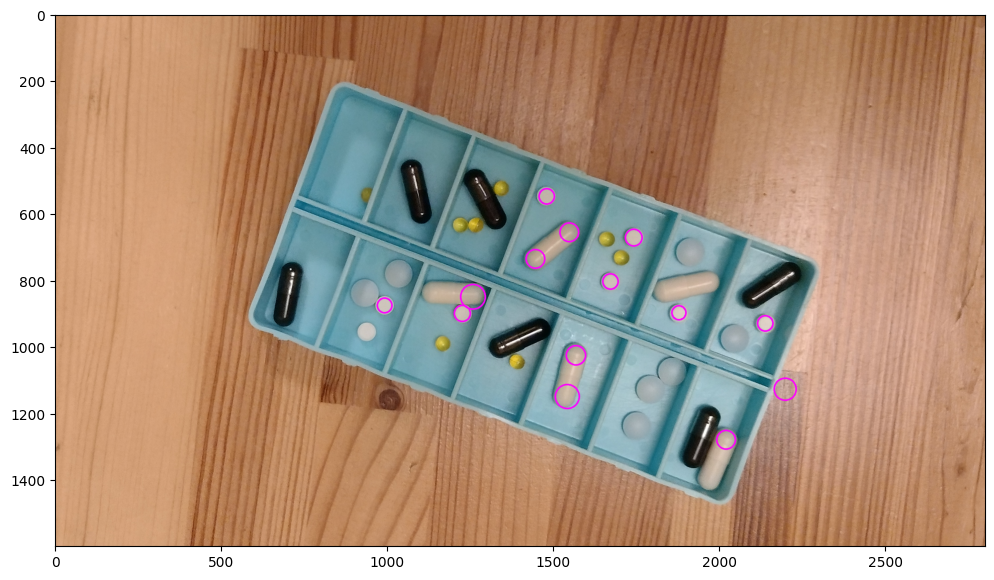

In [ ]:
plt.figure(figsize=(12,8))
img_copy = test.copy()
circles = cv2.HoughCircles(edored, method = cv2.HOUGH_GRADIENT, dp = 1, minDist=30, param1=200, param2=11,minRadius=20, maxRadius=40)
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center1 = (i[0], i[1])
            radius1 = i[2]
            # print(center1, radius1)
            cv2.circle(img_copy, center1, radius1, (255, 0, 255), 3)
plt.imshow(img_copy[..., ::-1]);

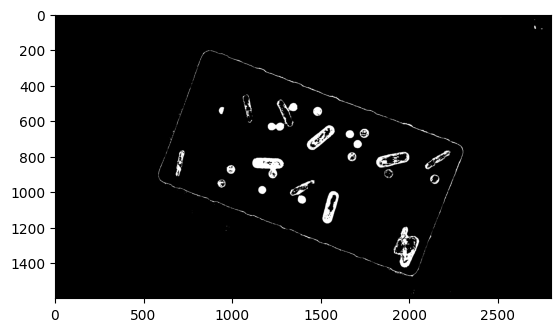

In [ ]:
h,s,v = cv2.split(test_hsv)
hue_mask = cv2.inRange(h, 15, 35)
plt.imshow(hue_mask, cmap='gray');

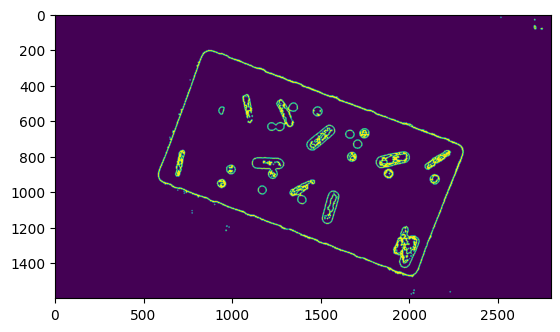

In [ ]:
contours, _ = cv2.findContours(np.int32(hue_mask), cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(np.zeros_like(hue_mask), contours, -1, 255, 3));

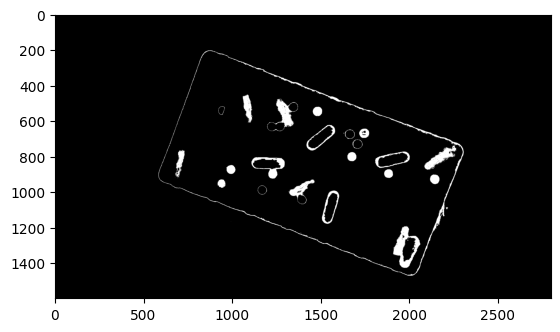

In [ ]:
mask_b = cv2.inRange(b, 130, 137)
plt.imshow(mask_b, cmap='gray');

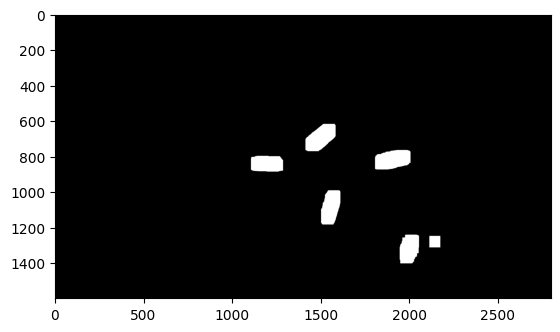

In [ ]:
eroded_white = eroded.copy()
# plt.imshow(eroded_white, cmap='gray');
eroded_white = cv2.erode(eroded_white, np.ones((5,5), np.uint8), iterations=2)
eroded_white = cv2.dilate(eroded_white, np.ones((5,5), np.uint8), iterations=15)
plt.imshow(eroded_white, cmap='gray');

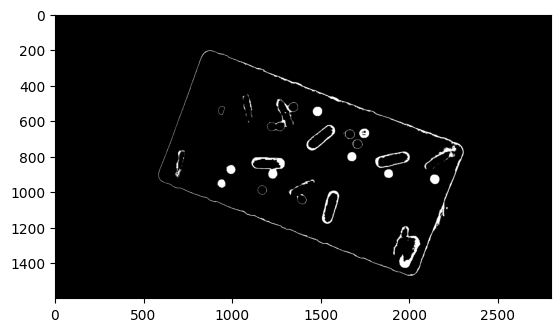

In [ ]:
black_mask = dilate.copy()
mask = cv2.bitwise_and(~black_mask, mask_b)
plt.imshow(mask, cmap='gray');

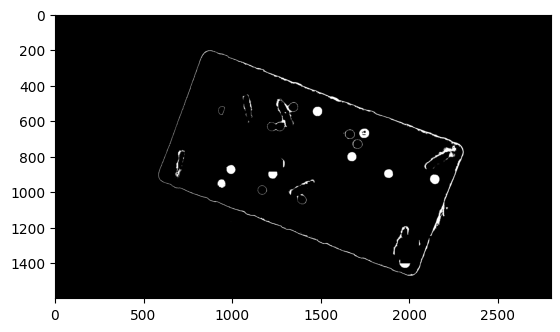

In [ ]:
mask_v2 = cv2.bitwise_and(mask, ~eroded_white)
plt.imshow(mask_v2, cmap='gray');

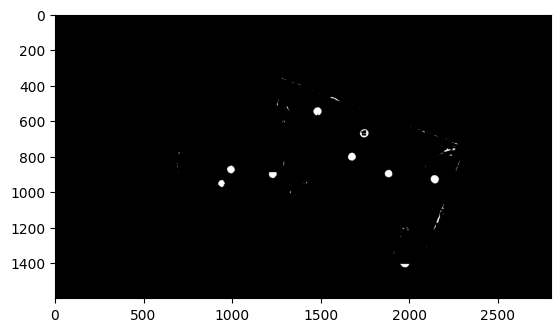

In [ ]:
erode = cv2.erode(mask_v2, np.ones((3,3), np.uint8), iterations=3)
plt.imshow(erode, cmap='gray');

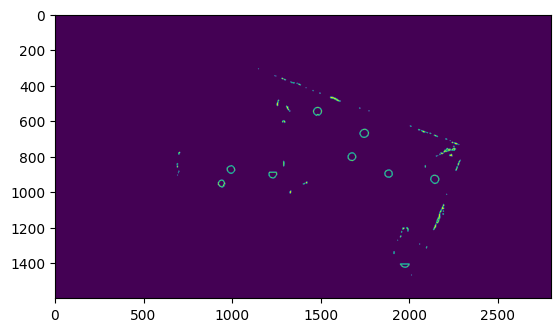

In [ ]:
contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(np.zeros_like(b), contours, -1, 255, 3));

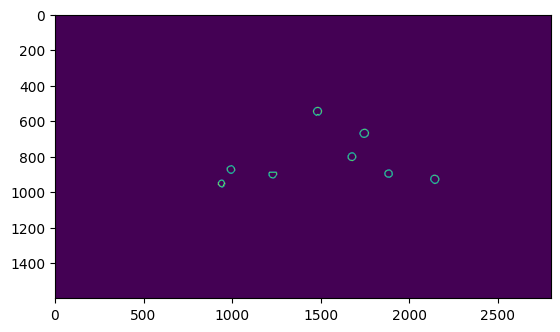

In [ ]:
contours_v2 = [c for c in contours if cv2.contourArea(c) > 700]
plt.imshow(cv2.drawContours(np.zeros_like(b), contours_v2, -1, 255, 3));

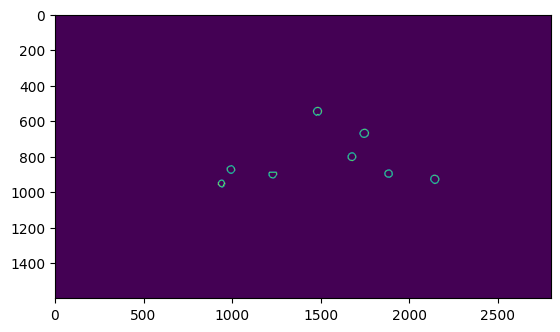

In [ ]:
contours_v3 = [c for c in contours_v2 if cv2.contourArea(c) < 2000]
plt.imshow(cv2.drawContours(np.zeros_like(b), contours_v3, -1, 255, 3));

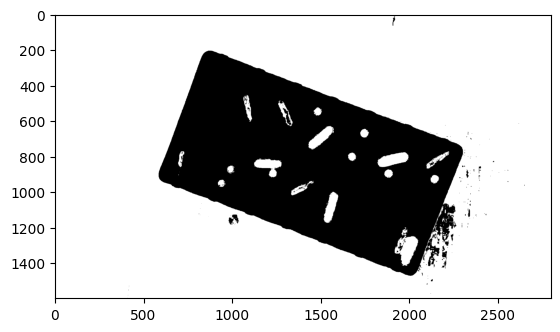

In [ ]:
h,s,v = cv2.split(test_hsv)
h_mask = cv2.inRange(h, 9, 19)
plt.imshow(h_mask, cmap='gray');

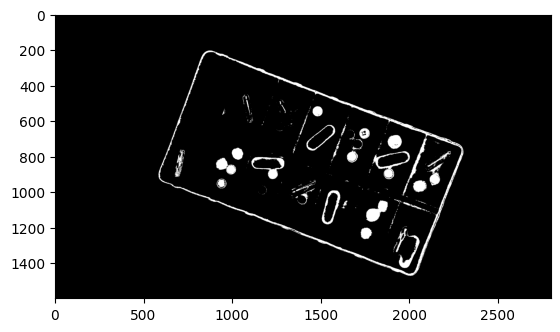

In [ ]:
s_mask = cv2.inRange(s, 8,35)
plt.imshow(s_mask, cmap='gray');

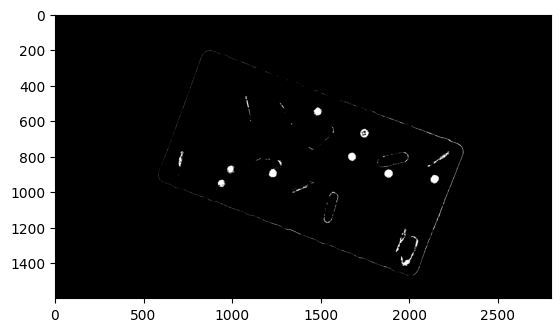

In [ ]:
mask = cv2.bitwise_and(h_mask, s_mask)
plt.imshow(mask, cmap='gray');

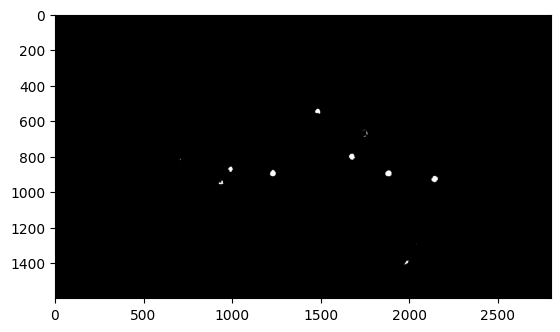

In [ ]:
erode = cv2.erode(mask, np.ones((3,3), np.uint8), iterations=4)
plt.imshow(erode, cmap='gray');

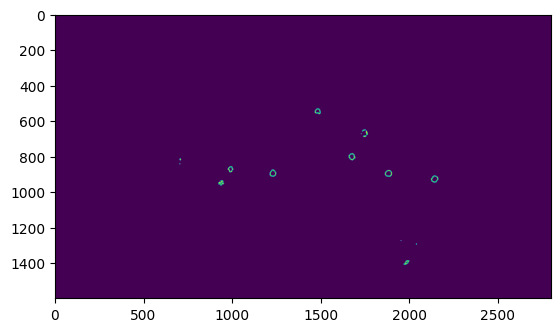

In [ ]:
contours = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
plt.imshow(cv2.drawContours(np.zeros_like(b), contours, -1, 255, 3));

In [ ]:
conts = []
for c in contours:
    conts.append(cv2.contourArea(c))
print(sorted(conts, reverse=True))

[886.5, 875.5, 821.0, 756.5, 536.0, 462.5, 250.0, 203.0, 55.0, 24.5, 11.0, 3.5, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
max_size = np.max(conts)
min_size = max_size/4
print(max_size, min_size)

886.5 221.625


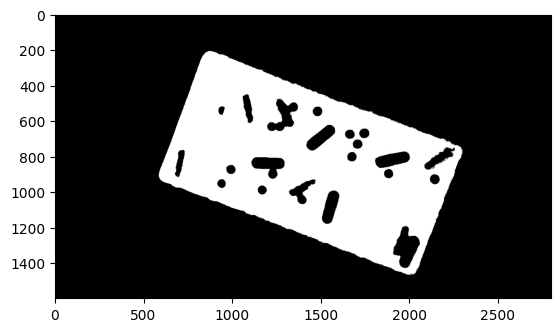

In [ ]:
h,s,v = cv2.split(test_hsv)
blue_mask = cv2.inRange(h, 80, 130)
plt.imshow(blue_mask, cmap='gray');

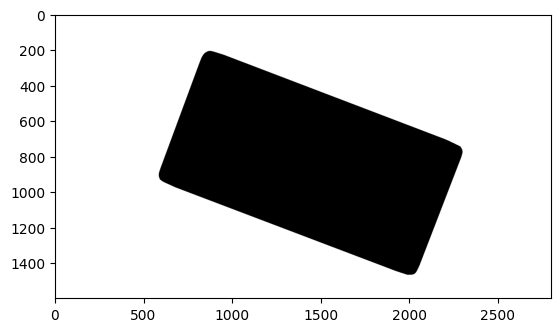

In [ ]:
contours = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
# plt.imshow(cv2.drawContours(np.zeros_like(b), contours, -1, 255, 3));
hull_mask = np.zeros_like(blue_mask)
for contour in contours:
    # Get the convex hull of the contour
    hull = cv2.convexHull(contour)
    # Draw and fill the convex hull
    cv2.drawContours(hull_mask, [hull], -1, 255, thickness=cv2.FILLED)
hull_mask = ~hull_mask
plt.imshow(hull_mask, cmap='gray');

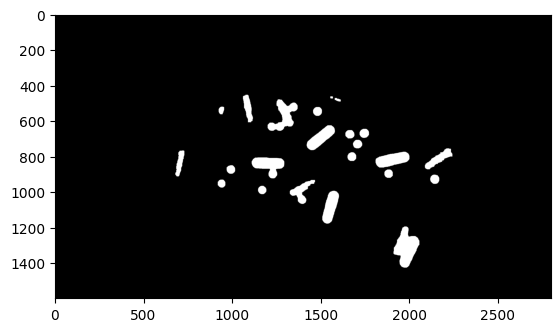

In [ ]:
pills_mask = ~cv2.bitwise_or(blue_mask, hull_mask)
pills_mask = cv2.erode(pills_mask, np.ones((5,5), np.uint8), iterations=3)
pills_mask = cv2.dilate(pills_mask, np.ones((3,3), np.uint8), iterations=5)
plt.imshow(pills_mask, cmap='gray');

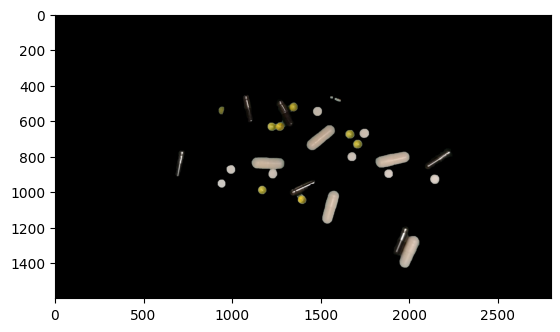

In [ ]:
pills = cv2.bitwise_and(test, test, mask=pills_mask)
plt.imshow(pills[..., ::-1]);

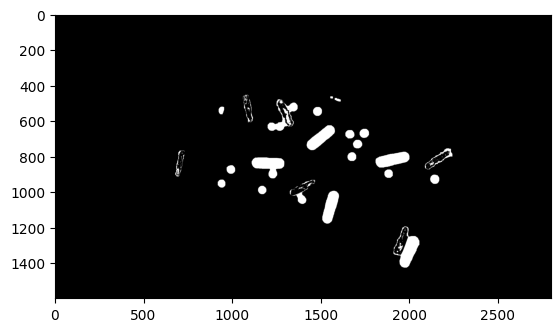

In [ ]:
white_only = cv2.bitwise_and(~black_hull_mask, pills_mask)
plt.imshow(white_only, cmap='gray');

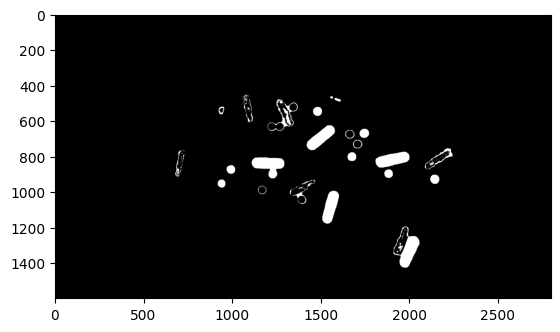

In [ ]:
y,u,v = cv2.split(cv2.cvtColor(pills, cv2.COLOR_BGR2YUV))
h,s,v = cv2.split(test_hsv)
mask_u = cv2.inRange(u, 100, 255)
# mask_red = cv2.inRange(h, 0, 5)
white_only = cv2.bitwise_and(white_only, mask_u)
# white_only = cv2.bitwise_and(white_only, ~mask_red)
plt.imshow(white_only, cmap='gray');
# plt.imshow(mask_red, cmap='gray');

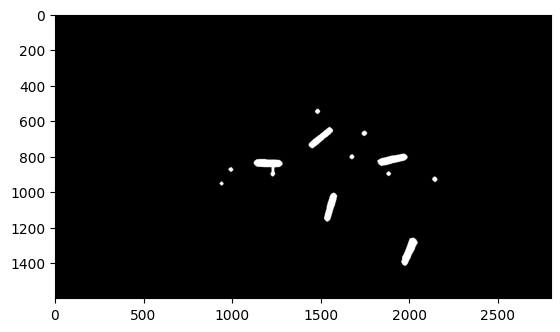

In [ ]:
eroded_white = cv2.erode(white_only, np.ones((3,3), np.uint8), iterations=9)
plt.imshow(eroded_white, cmap='gray');

In [ ]:
contours = cv2.findContours(eroded_white, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
conts = []
for c in contours:
    conts.append(cv2.contourArea(c))
print(sorted(conts)[:11])

[314.0, 452.0, 453.5, 506.0, 549.0, 599.0, 617.5, 5580.5, 5962.0, 6579.5, 6748.0]


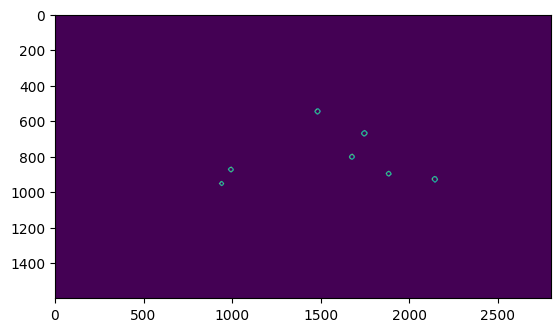

In [ ]:
small = [c for c in contours if cv2.contourArea(c) < 1000]
plt.imshow(cv2.drawContours(np.zeros_like(b), small, -1, 255, 3));

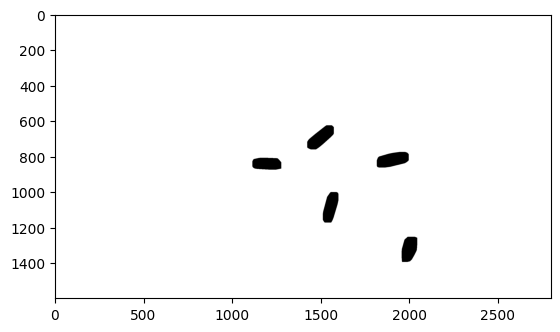

In [ ]:
hull_mask = np.zeros_like(eroded_white)
for contour in white_pills:
    # Get the convex hull of the contour
    hull = cv2.convexHull(contour)
    # Draw and fill the convex hull
    cv2.drawContours(hull_mask, [hull], -1, 255, thickness=cv2.FILLED)

hull_mask = cv2.dilate(hull_mask, np.ones((5,5), np.uint8), iterations=7)
hull_mask = ~hull_mask
plt.imshow(hull_mask, cmap='gray');

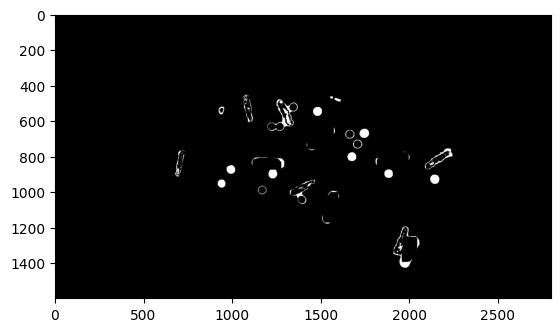

In [ ]:
white_only = cv2.bitwise_and(white_only, hull_mask)
plt.imshow(white_only, cmap='gray');

In [ ]:
eroded_white = cv2.erode(white_only, np.ones((3,3), np.uint8), iterations=10)
plt.imshow(eroded_white, cmap='gray');

NameError: name 'cv2' is not defined

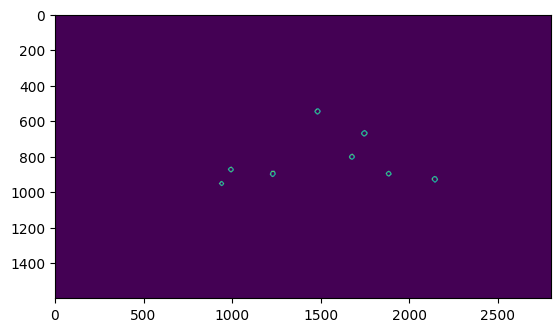

In [ ]:
contours = cv2.findContours(eroded_white, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
small = [c for c in contours if cv2.contourArea(c) < 1000]
small = [c for c in small if cv2.contourArea(c) > 300]
plt.imshow(cv2.drawContours(np.zeros_like(b), small, -1, 255, 3));